# Tarea 04. Estadistica Aplicada: Modelo de regresion lineal

---

*   Jessica Melani Romero Lora

*   Jesus Gerhard Cortes Spross





## Importacion de librerias y base de datos

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport
import seaborn as sns
import statsmodels

In [ ]:
pd.read_csv('/content/drive/MyDrive/Datasets para tareas/insurance_claims.csv')
df = pd.read_csv('/content/drive/MyDrive/Datasets para tareas/insurance_claims.csv')

## Analisis exploratorio del dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Eliminacion de la columna "c_39" por no tener contenido:
df = df.drop(columns=['_c39'])

## Segmentacion y tratamiento de las columnas object

---



In [ ]:
import numpy as np
import pandas as pd

object_cols = df.select_dtypes(include=['object']).columns
print(f"Columnas object: {object_cols}")

Columnas object: Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


In [ ]:
for col in object_cols:
  print(f"\n--- Columna: {col} ---")
  print(df[col].value_counts().head(15))


--- Columna: policy_bind_date ---
policy_bind_date
1992-08-05    3
2006-01-01    3
1992-04-28    3
1996-07-07    2
2002-07-16    2
1992-01-05    2
1999-12-07    2
2002-07-09    2
2010-01-28    2
2003-03-09    2
1999-09-29    2
1997-11-07    2
2000-05-04    2
1999-04-07    2
1991-12-28    2
Name: count, dtype: int64

--- Columna: policy_state ---
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

--- Columna: policy_csl ---
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64

--- Columna: insured_sex ---
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

--- Columna: insured_education_level ---
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64

--- Columna: insured_occupation ---
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales              

## Visualizacion de valores faltantes

---



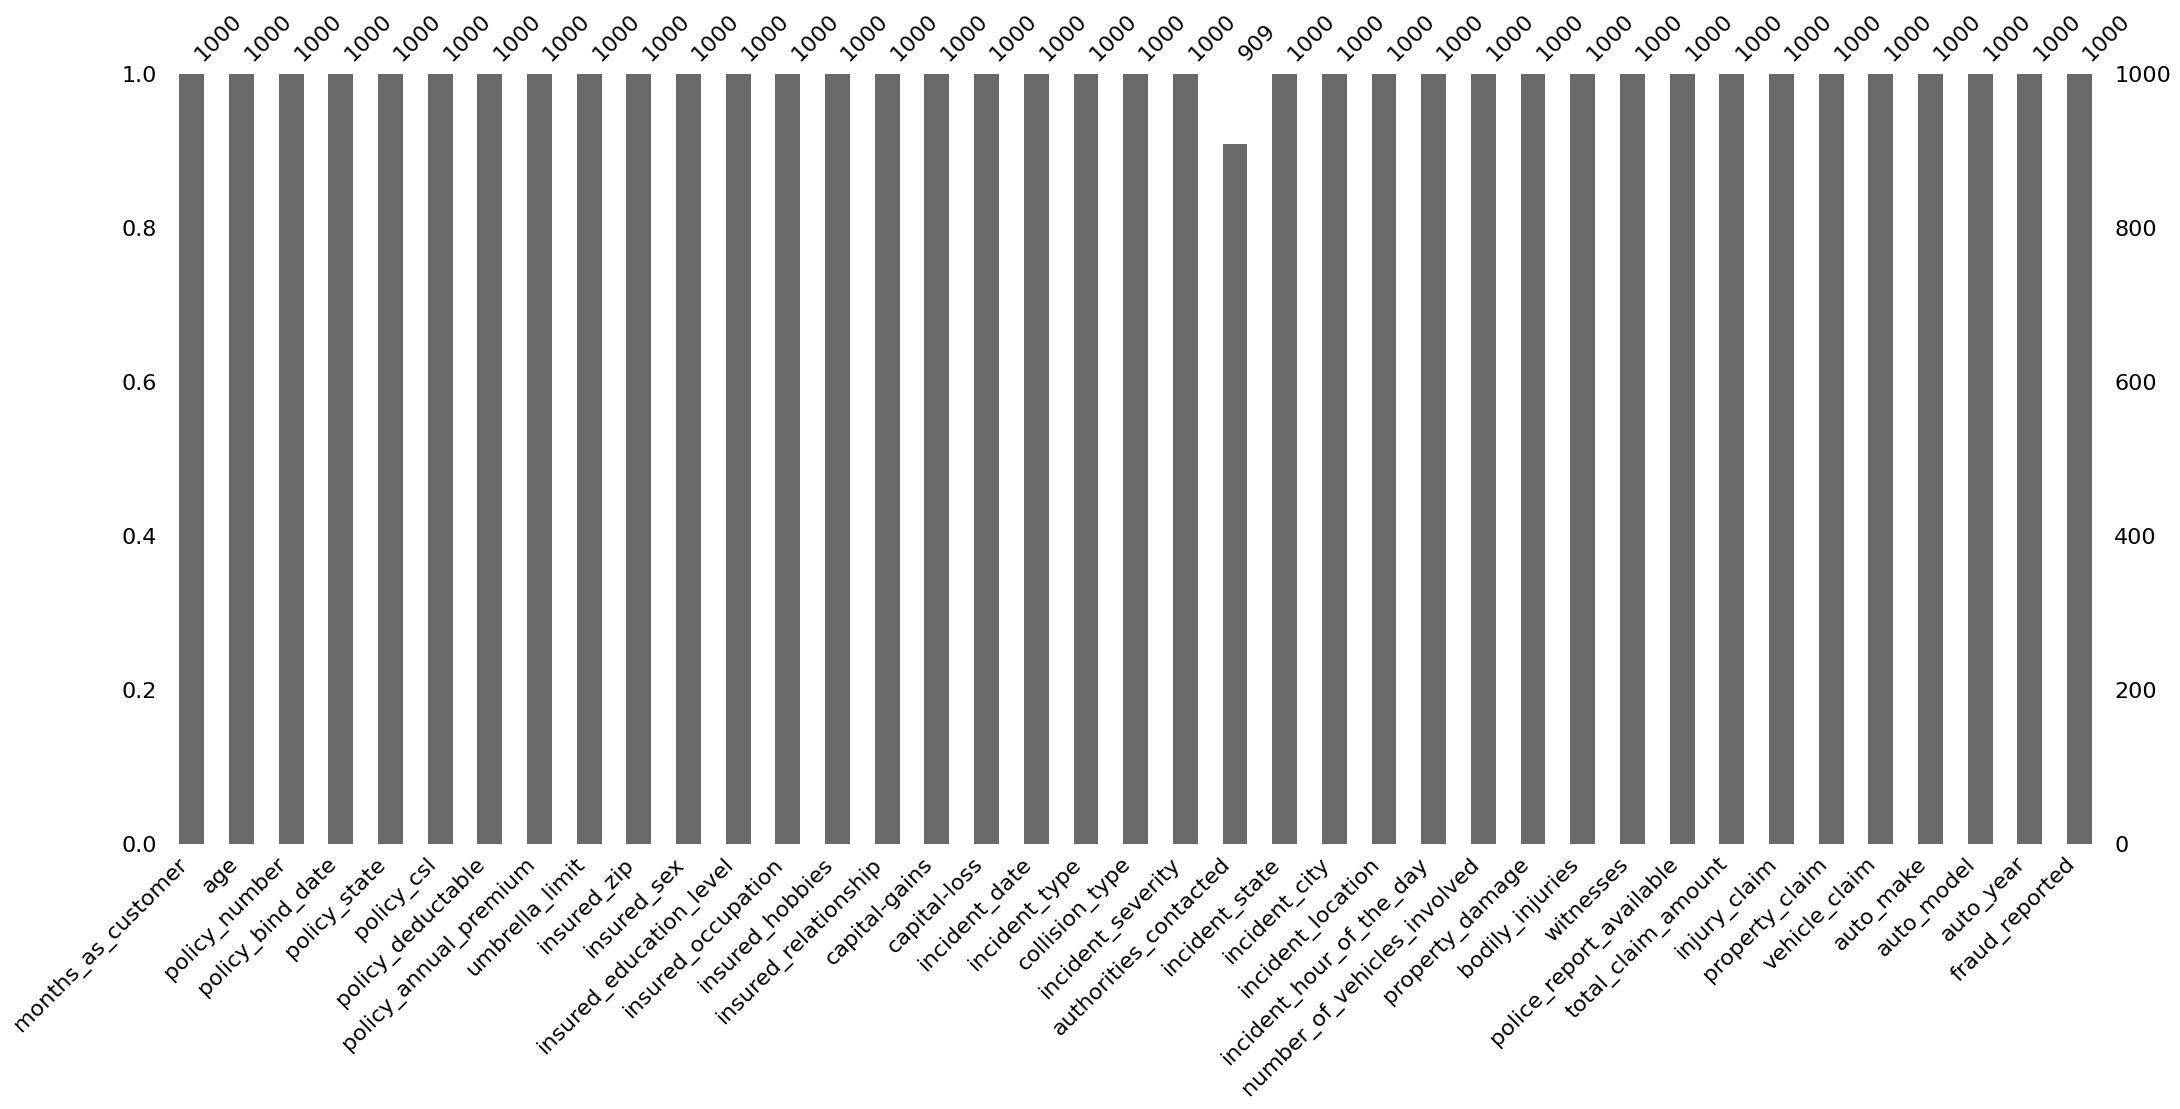

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
msno.bar(df)
plt.show()

## Eliminacion de valores NaN's

---



In [ ]:
print(f"¿'c_39' sigue en el df? {'c_39' in df.columns}")
print (f"Nuevas dimensiones del df: {df.shape}")

¿'c_39' sigue en el df? False
Nuevas dimensiones del df: (1000, 39)


In [ ]:
df_clean = df.dropna(subset=['total_claim_amount'])

In [ ]:
Y = df_clean['total_claim_amount']
columnas_leakege=['total_claim_amount','vehicle_claim','property_claim','injury_claim','test_sum']
X = df_clean.drop(columns=columnas_leakege, errors='ignore').copy()
print('¡Las columnas leakege han sido eliminadas!')

¡Las columnas leakege han sido eliminadas!


In [ ]:
# columnas utilizadas para el modelo con df limpio, sin 'c_39' y pre-procesado para etapa de pre-entrenamiento
numeric_features = X.select_dtypes(include=['int64','float64',]).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
print(f"Caracteristicas numericas que procesara el modelo: {len(numeric_features)}")
print(f"Caracteristicas categoricas que procesara el modelo: {len(categorical_features)}")

Caracteristicas numericas que procesara el modelo: 14
Caracteristicas categoricas que procesara el modelo: 21


## Mapa de calor para visualizacion de correlaciones entre variables

---



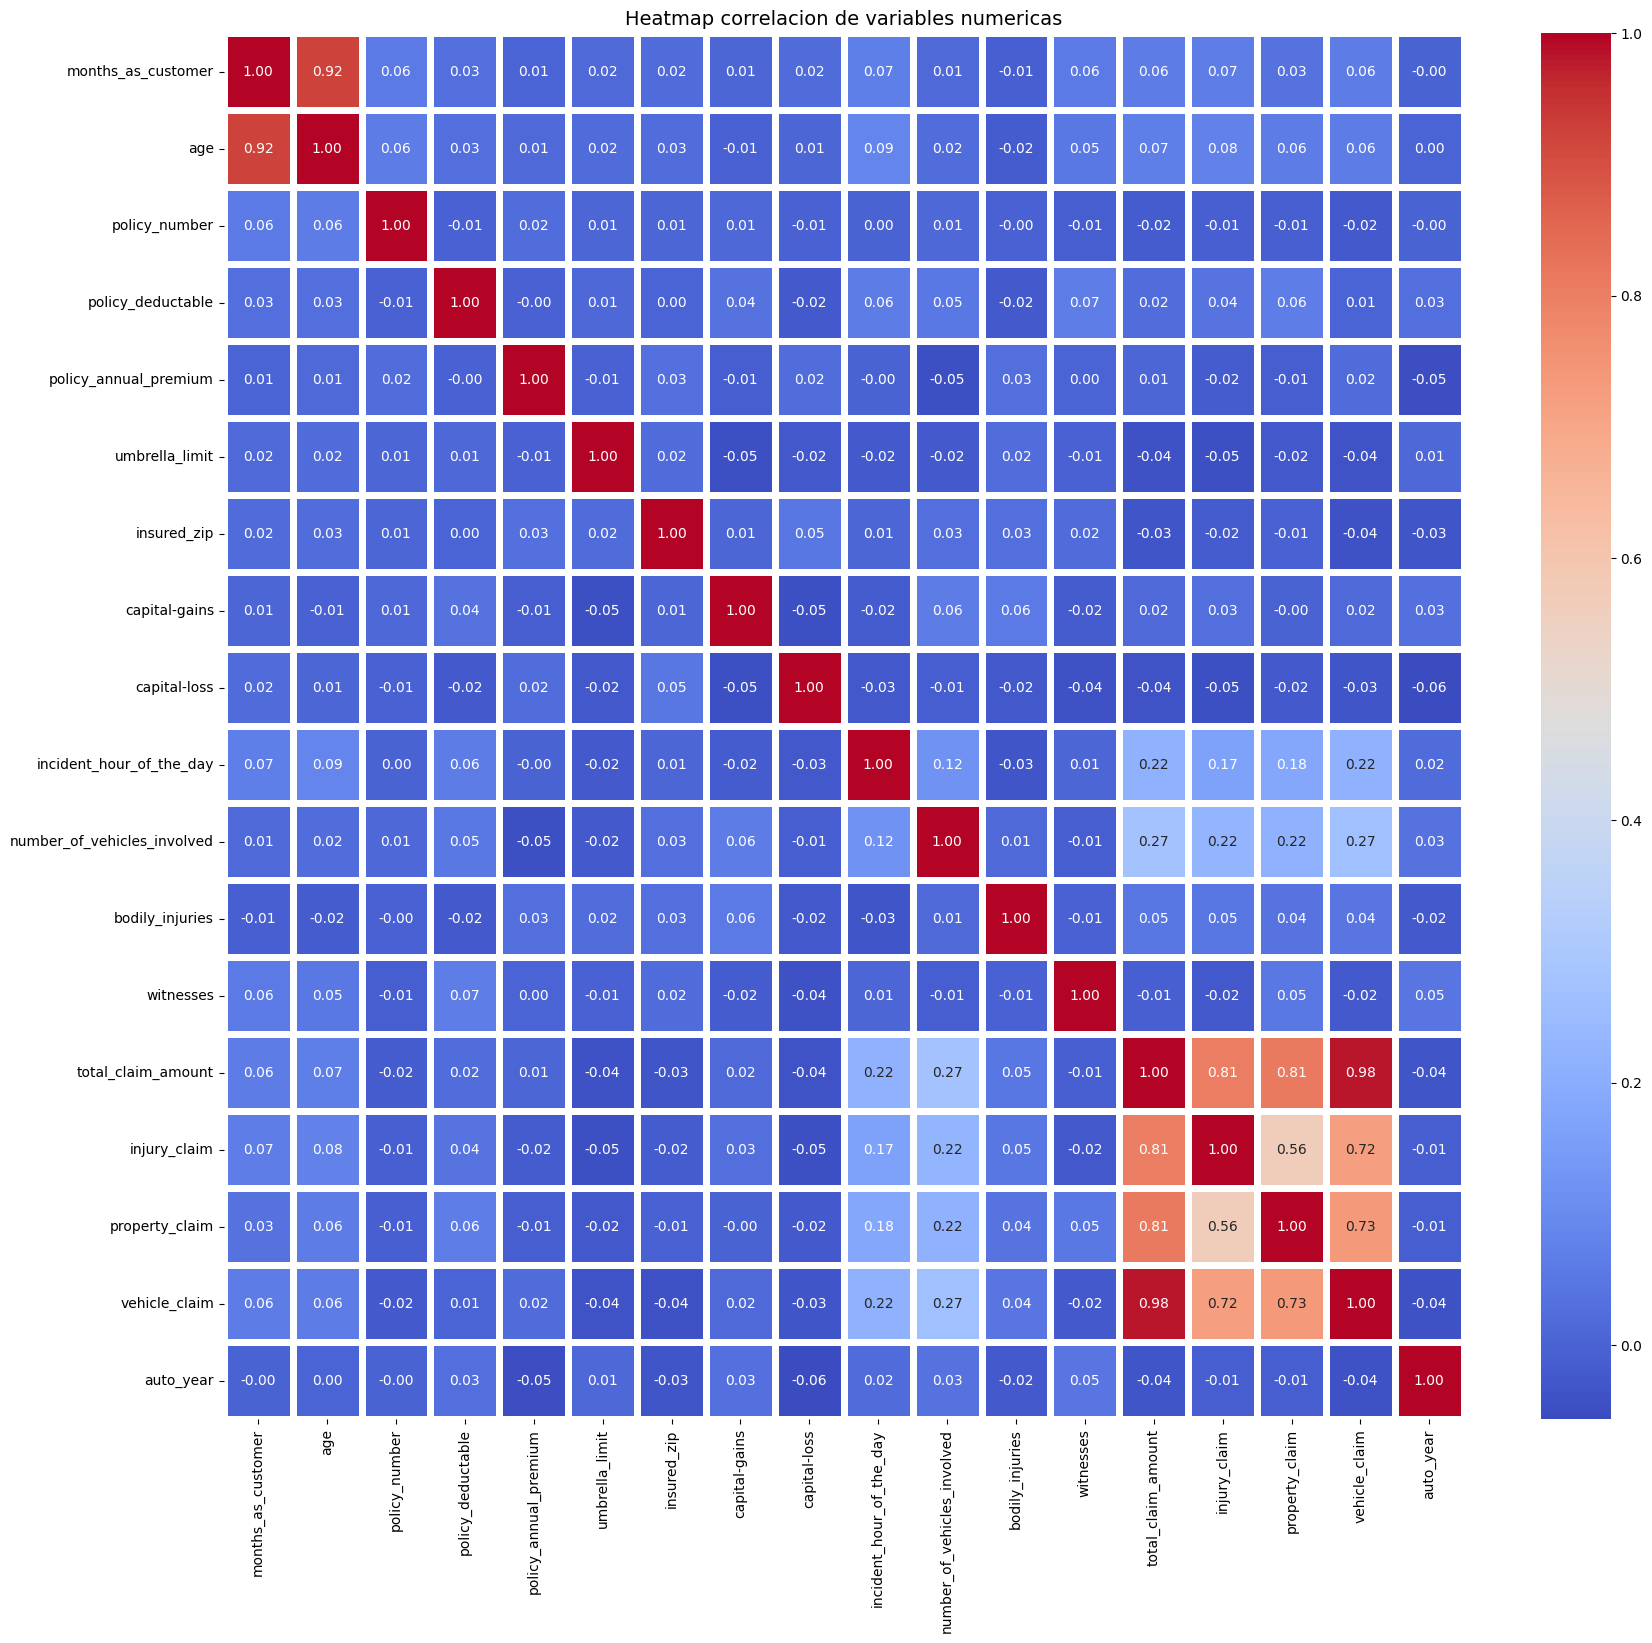

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])
# metodo de pearson - creacion del heatmap
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidth=-5)
plt.title('Heatmap correlacion de variables numericas', fontsize=14)
plt.show()

## Variables categoricas: exploracion e identificacion:
---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
X = df.drop(columns=['total_claim_amount', 'vehicle_claim', 'injury_claim', 'property_claim'])
Y = df['total_claim_amount']
print(f'Eje X')
print(X.head())
print(f'\nEje Y')
print(Y.head())

Eje X
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... incident_hour_of_the_day number_of_vehicles_involved  \
0       466132  ...   

In [ ]:
# extraccion de columnas categoricas (yes/mo, female/ male, casado, soltero, ocupacion)
categoricas = X.select_dtypes(include = ['object'])
categoricas.head(20)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,...,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,2006-10-12,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,2015-01-02,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,2000-06-04,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,2015-01-13,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N
7,1990-02-03,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,2015-02-27,Multi-vehicle Collision,...,Total Loss,Police,VA,Columbus,3525 3rd Hwy,?,YES,Audi,A5,N
8,1997-02-05,IL,100/300,FEMALE,PhD,other-service,golf,own-child,2015-01-30,Single Vehicle Collision,...,Total Loss,Police,WV,Arlington,4872 Rock Ridge,NO,YES,Toyota,Camry,N
9,2011-07-25,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,2015-01-05,Single Vehicle Collision,...,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,NO,?,Saab,92x,N


In [ ]:
# revisar los valores por columna de las variables categoricas
for col in categoricas:
  print(f"{col}: /n{categoricas[col].unique()}/n")

policy_bind_date: /n['2014-10-17' '2006-06-27' '2000-09-06' '1990-05-25' '2014-06-06'
 '2006-10-12' '2000-06-04' '1990-02-03' '1997-02-05' '2011-07-25'
 '2002-05-26' '1999-05-29' '1997-11-20' '2012-10-26' '1998-12-28'
 '1992-10-19' '2005-06-08' '2004-11-15' '2014-12-28' '1992-08-02'
 '2002-06-25' '2005-11-27' '1994-05-27' '1991-02-08' '1996-02-02'
 '2013-12-05' '1990-09-20' '2002-07-18' '1990-02-08' '2014-03-04'
 '2000-02-18' '2008-06-19' '2003-08-01' '1992-04-04' '1991-01-13'
 '2010-08-08' '2003-03-09' '1993-02-03' '2002-11-25' '1997-07-27'
 '1995-05-08' '2012-08-30' '2006-04-30' '2003-04-13' '2007-12-05'
 '2006-08-21' '1990-01-08' '1990-03-18' '2008-01-07' '1997-03-10'
 '2004-01-10' '1994-08-20' '2002-06-02' '1994-04-28' '2014-08-17'
 '2007-08-11' '2008-11-20' '1995-10-18' '1993-05-19' '2005-02-26'
 '1990-02-14' '1993-09-30' '2014-06-10' '2008-10-28' '2007-04-24'
 '1993-12-13' '2011-08-17' '1990-08-20' '1994-02-11' '1994-02-22'
 '2011-08-15' '1998-11-11' '1995-12-04' '2002-12-28' '20

In [ ]:
print(f"Features categoricas a procesar: {len(categorical_features)}")

Features categoricas a procesar: 21


## Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# alta cardinalidad presente en el dataset ocasiona severas confusiones para el modelo
# creacion de copia para trabajar el nuevo df
x_engineered = df_clean.copy()
# transformacion de categorias de fecha porque, memorizo fechas para la prediccion (ERROR)

In [ ]:
df_clean.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [ ]:
df_clean = df_clean.drop(columns='_c39', errors='ignore')
print(f"¿'_c39' sigue en el df? {'_c39' in df_clean.columns}")
print(f"Nuevas dimensiones del df: {df_clean.shape}")

¿'_c39' sigue en el df? False
Nuevas dimensiones del df: (1000, 39)


In [ ]:
x_engineered['policy_bind_date'] = pd.to_datetime(x_engineered['policy_bind_date'])
x_engineered['incident_date'] = pd.to_datetime(x_engineered['incident_date'], errors='coerce')

print("Transformando ubicaciones usando .str.split()...")


Transformando ubicaciones usando .str.split()...


In [ ]:
x_engineered['incident_location'] = x_engineered['incident_location'].astype(str).fillna('Unknown Unknown')

# 'expand=True' crea un nuevo DataFrame con las partes separadas
location_parts = x_engineered['incident_location'].str.split(' ', n=2, expand=True)
x_engineered['incident_street_type'] = location_parts[2]

In [ ]:
# si address/dirección solo tenía 2 partes (ej. "5226 Maple"), el [2] será 'NaN'
x_engineered['incident_street_type'] = x_engineered['incident_street_type'].fillna('Other')

print("Tipos de calle únicos encontrados:")
print(x_engineered['incident_street_type'].value_counts().head(10))

Tipos de calle únicos encontrados:
incident_street_type
Drive    173
Lane     171
Ridge    171
St       171
Ave      161
Hwy      153
Name: count, dtype: int64


In [ ]:
# x / y definidos:
print("Preparando X e Y finales...")
Y = x_engineered['total_claim_amount']

columnas_con_fuga = ['total_claim_amount', 'vehicle_claim', 'property_claim', 'injury_claim', 'test_sum']
columnas_originales_a_quitar = ['policy_bind_date', 'incident_date',
                                'incident_location'] # <-- Quitamos la original

X = x_engineered.drop(columns=columnas_con_fuga + columnas_originales_a_quitar,
                       errors='ignore')

Preparando X e Y finales...


## Inicio del pipeline de procesamiento
---

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# 'incident_street_type' es ahora CATEGORICA
categorical_features = X.select_dtypes(include=['object']).columns

print(f"Nuevas features numéricas: {list(numeric_features)}")
print(f"Nuevas features categóricas: {list(categorical_features)}")

Nuevas features numéricas: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year']
Nuevas features categóricas: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'incident_street_type']


In [ ]:
print(f"Features numericas a procesar: {len(numeric_features)}")

Features numericas a procesar: 14


In [ ]:
print(f"Features categoricas a procesar: {len(categorical_features)}")

Features categoricas a procesar: 19


## Definicion del pipeline completo
---

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import TweedieRegressor

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
tweedie_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TweedieRegressor(max_iter=1000))
])

param_grid = {
    'regressor__power': [1.5, 1.7, 1.8, 1.9],
    'regressor__alpha': [0.1, 0.5, 1.0, 5.0]
}

grid_search = GridSearchCV(tweedie_pipeline, param_grid,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1, cv=5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_tweedie_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('interactions', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('regressor', TweedieRegressor(max_iter=1000))
])

param_grid = {
    'regressor__power': [1.5, 1.7, 1.8, 1.9],
    'regressor__alpha': [0.1, 0.5, 1.0, 5.0]
}

grid_search = GridSearchCV(poly_tweedie_pipeline, param_grid,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1, cv=5)

In [ ]:
                          # Division de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)

                          # Inicio del entrenamiento

grid_search.fit(X_train, Y_train)

print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

rmse_tweedie = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2_tweedie = r2_score(Y_test, Y_pred)

print("\n--- Resultados del Modelo Tweedie Optimizado ---")
print(f"R-cuadrado: {r2_tweedie:.4f}")
print(f"RMSE: ${rmse_tweedie:.2f}")

Mejores parámetros encontrados: {'regressor__alpha': 5.0, 'regressor__power': 1.8}

--- Resultados del Modelo Tweedie Optimizado ---
R-cuadrado: 0.6336
RMSE: $15615.36


In [ ]:
print(f"Nuevo R-cuadrado (R²): {r2_tweedie:.4f}")

Nuevo R-cuadrado (R²): 0.6336


In [ ]:
print(f"Nuevo RMSE: ${rmse_tweedie: .2f}")

Nuevo RMSE: $ 15615.36


In [ ]:
Y_pred = best_model.predict(X_test)

In [ ]:
print(f"R-cuadrado (R²): {r2_tweedie:.4f}")
print(f"RMSE (Error Promedio): ${rmse_tweedie:.2f}")

R-cuadrado (R²): 0.6336
RMSE (Error Promedio): $15615.36


## Visualizacion de los resultados de entrenamiento:
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Radiografia del modelo:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

modelo_tweedie = best_model.named_steps['regressor']
preprocesador = best_model.named_steps['preprocessor']
interactions_step = best_model.named_steps['interactions']


feature_names = best_model.named_steps['interactions'].get_feature_names_out(
    input_features=best_model.named_steps['preprocessor'].get_feature_names_out()
)

coeficientes_tweedie = pd.Series(modelo_tweedie.coef_, index=feature_names)

top_features_tweedie = coeficientes_tweedie.abs().sort_values(ascending=False).head(20)
top_coefs_tweedie = coeficientes_tweedie.loc[top_features_tweedie.index]

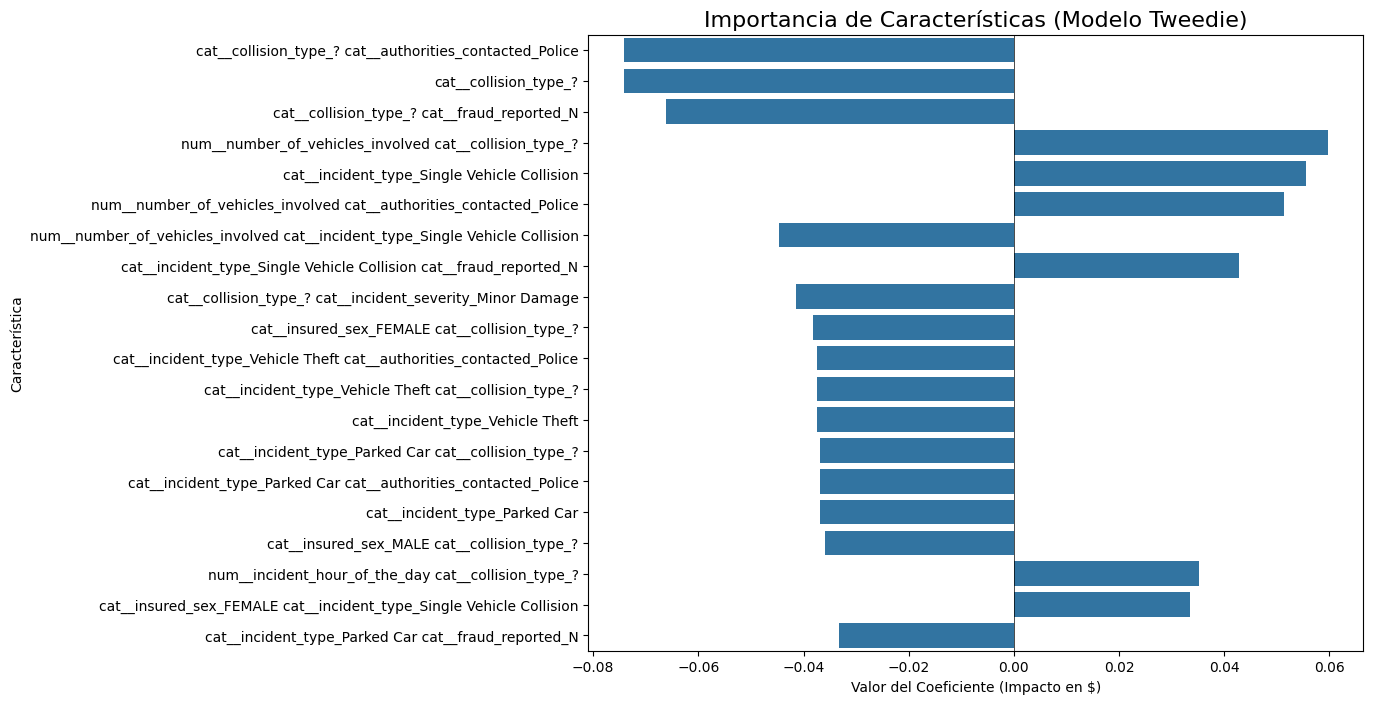

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top_coefs_tweedie.values, y=top_coefs_tweedie.index, orient='h')
plt.title('Importancia de Características (Modelo Tweedie)', fontsize=16)
plt.xlabel('Valor del Coeficiente (Impacto en $)')
plt.ylabel('Característica')
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [ ]:
# Donde barras largas a la derecha (eje x - positivo) aumentan el monto del reclamo ($)
# Donde barras largas a la izquierda (eje y- negativas) disminuyen el monto del reclamo

## Grafico de valores de prediccion vs valores reales
---

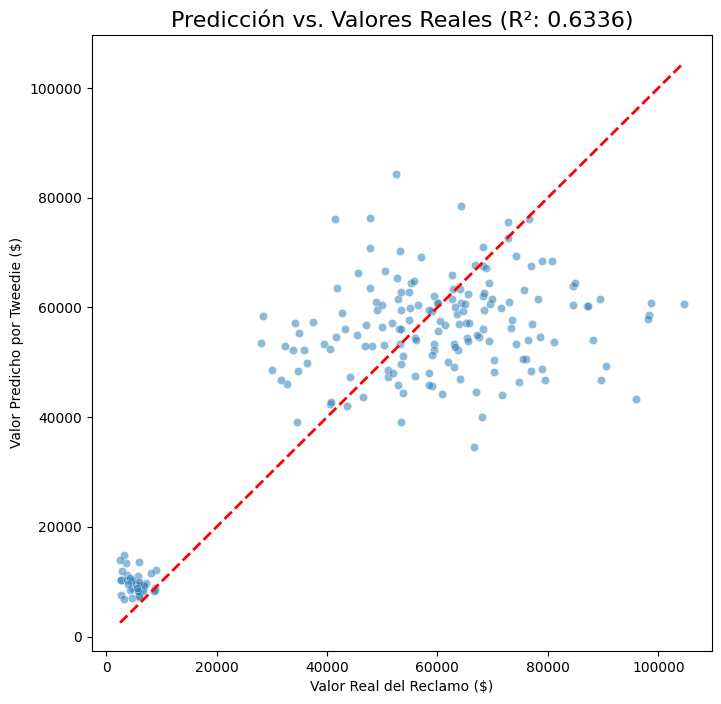

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title(f'Predicción vs. Valores Reales (R²: {r2_tweedie:.4f})', fontsize=16)
plt.xlabel('Valor Real del Reclamo ($)')
plt.ylabel('Valor Predicho por Tweedie ($)')
plt.show()

## Grafico de residuos:

---



In [ ]:
residuos_reales = Y_test - Y_pred

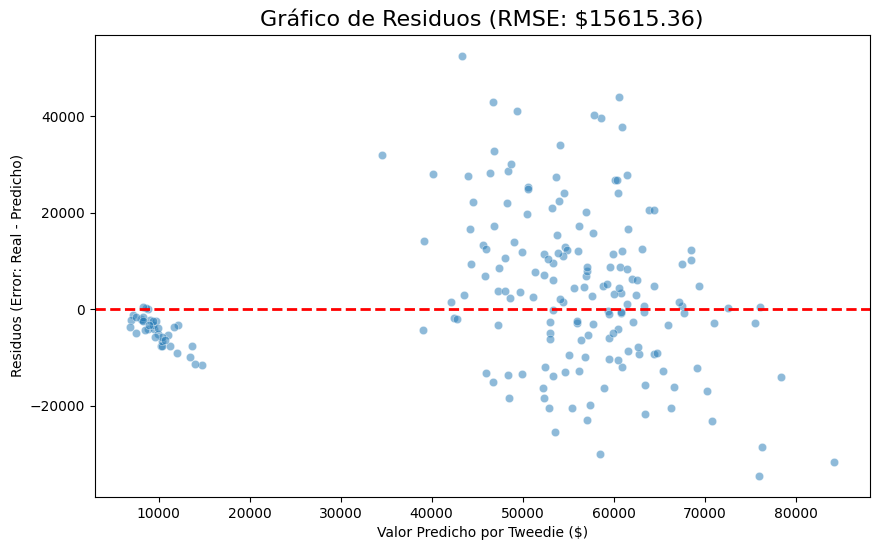

In [ ]:
residuos_tweedie = Y_test - Y_pred # <-- Y_pred de Tweedie

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuos_tweedie, alpha=0.5) # <-- Y_pred de Tweedie
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.title(f'Gráfico de Residuos (RMSE: ${rmse_tweedie:.2f})', fontsize=16)
plt.xlabel('Valor Predicho por Tweedie ($)')
plt.ylabel('Residuos (Error: Real - Predicho)')
plt.show()